<a href="https://colab.research.google.com/github/FelixCinq-Mars/Metro-Incident-Data-Science/blob/main/What_factors_seem_to_best_explain_the_daily_Montr%C3%A9al_STM_metro_incident_rate%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

## What factors seem to best explain the daily Montréal STM metro incident rate?

By Félix Cinq-Mars and Yalda Sedghi

# Introduction

The STM, société du transport de Montréal, maintains all metro transport services in Montreal since 1966. Of course, the metro faces many incidents throughout its service. Station and train events occur every day in the Montreal network. We are interested in discovering the causes of accidents occuring on metro trains rather than metro stations since station incidents do not necessarily mean service interruption. “What factors seem to best explain the daily Montréal STM metro incident rate?” is therefore a fascinating question to answer. Indeed, it is more relevant to study the metro train incidents since they can affect us during our travels and they are sometimes more complex.

# Data Pre-Processing

## Importing Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Discussion On Data Quality

The STM metro incidents dataset comes from the Montreal Open Data Portal: https://donnees.montreal.ca/societe-de-transport-de-montreal/incidents-du-reseau-du-metro

In [ ]:
metro_incidents_df = pd.read_csv('https://donneesouvertes.stm.info/fichiers/Incidents%20m%C3%A9tro.csv')
metro_incidents_df

,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,Urgence métro,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire
0,S01011901,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:32,#,#,Non affecté,Snowdon,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
1,S01011902,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:42,#,#,Non affecté,Snowdon,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
2,S01011903,S,Autres,Autres,Clientèle,Ligne verte,#,03:35,04:41,#,#,Non affecté,Place-des-Arts,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
3,S01011904,S,Autres,Autres,Clientèle,Ligne verte,#,04:56,05:36,#,#,Non affecté,Lionel-Groulx,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
4,S01011905,S,Autres,Autres,Clientèle,Ligne verte,#,05:25,05:54,#,#,Non affecté,Berri-UQAM,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,T31101913,T,Clientèle,Nuisance involontaire,Matériel roulant,Ligne orange,16,17:42,17:58,10481,#,Non affecté,Rosemont,0,0,0,1,1,Train,2019,2019-10,10,31,4,2019-10-31
6464,T31101914,T,Clientèle,Méfait volontaire,Clientèle,Ligne verte,9,19:27,19:29,#,#,Non affecté,Cadillac,0,0,1,0,0,#,2019,2019-10,10,31,4,2019-10-31
6465,T31101915,T,Clientèle,Blessée ou malade,Clientèle,Ligne bleue,3,19:51,19:59,78014,2;,Non affecté,Fabre,0,1,0,0,0,#,2019,2019-10,10,31,4,2019-10-31
6466,T31101916,T,Équipements fixes,Service de la voie,Équipements fixes,Ligne verte,#,23:00,23:08,#,#,Non affecté,Lionel-Groulx/Atwater,0,0,0,0,1,#,2019,2019-10,10,31,4,2019-10-31


The STM metro incidents dataset comes from Montreal Open Data Portal. It contains detailed information about all of metro station and train incidents from 2019 with variables such as primary and secondary cause, date, station, line and incident type. This dataset provides a great choice of relevant variables to study from and where descriptive statistics can be applied. 

In [ ]:
metro_incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Numero d'incident    6468 non-null   object
 1   Type d'incident      6468 non-null   object
 2   Cause primaire       6468 non-null   object
 3   Cause secondaire     6468 non-null   object
 4   Symptome             6468 non-null   object
 5   Ligne                6468 non-null   object
 6   Numéro de tournée    6468 non-null   object
 7   Heure de l'incident  6468 non-null   object
 8   Heure de reprise     6468 non-null   object
 9   Véhicule             6468 non-null   object
 10  Porte de voiture     6468 non-null   object
 11  Type de matériel     6468 non-null   object
 12  Code de lieu         6468 non-null   object
 13  Dommage matériel     6468 non-null   int64 
 14  KFS                  6468 non-null   int64 
 15  Porte                6468 non-null   int64 
 16  Urgenc

Indeed, we can see that the dataset has 6468 and 24 columns. Having many columns and rows is crucial because it allows an efficient study on data science techniques, statistics, and machine learning. It also allows us to have more precise results and scores when analysing this dataset. Even if this dataset only provides incidents from 2019, it can still give us accurate results and statistics that can represent today's STM metro service. 

In [ ]:
metro_incidents_df.groupby('Jour calendaire').size()


Jour calendaire
2019-01-01    24
2019-01-02    10
2019-01-03    18
2019-01-04    20
2019-01-05    13
              ..
2019-10-27    18
2019-10-28    11
2019-10-29    20
2019-10-30    27
2019-10-31    25
Length: 304, dtype: int64

We can see that the data provides a list of incidents from January 1 to October 31, which means 304 days of data. It is helpful to note this to continue working on our data.

## Applying Pre-Processing Techniques

Since we are only interested in metro train incidents, we will just consider them in our dataset.

In [ ]:
train_incidents = metro_incidents_df.loc[metro_incidents_df['Type d\'incident'] == 'T']
train_incidents

,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,Urgence métro,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire
2274,T01011901,T,Autres,Causes externes,"Feu, fumée, odeur, produit, etc...",Ligne verte,#,02:28,02:28,#,#,Non affecté,Berri-UQAM,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
2275,T01011902,T,Clientèle,Méfait volontaire,Clientèle,Ligne verte,#,02:37,02:37,#,#,Non affecté,Place-des-Arts,0,0,0,0,1,#,2019,2019-01,1,1,2,2019-01-01
2276,T01011903,T,Clientèle,Méfait volontaire,Clientèle,Ligne orange,59,04:27,04:30,10195,#,Non affecté,Place-D'Armes,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
2277,T01011904,T,Clientèle,Méfait volontaire,Clientèle,Ligne verte,61,05:22,05:26,#,#,Non affecté,Radisson,0,0,0,0,1,#,2019,2019-01,1,1,2,2019-01-01
2278,T01011905,T,Clientèle,Méfait volontaire,Équipements fixes,Ligne verte,#,06:25,06:35,#,#,Non affecté,St-Laurent,0,0,0,0,1,#,2019,2019-01,1,1,2,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,T31101913,T,Clientèle,Nuisance involontaire,Matériel roulant,Ligne orange,16,17:42,17:58,10481,#,Non affecté,Rosemont,0,0,0,1,1,Train,2019,2019-10,10,31,4,2019-10-31
6464,T31101914,T,Clientèle,Méfait volontaire,Clientèle,Ligne verte,9,19:27,19:29,#,#,Non affecté,Cadillac,0,0,1,0,0,#,2019,2019-10,10,31,4,2019-10-31
6465,T31101915,T,Clientèle,Blessée ou malade,Clientèle,Ligne bleue,3,19:51,19:59,78014,2;,Non affecté,Fabre,0,1,0,0,0,#,2019,2019-10,10,31,4,2019-10-31
6466,T31101916,T,Équipements fixes,Service de la voie,Équipements fixes,Ligne verte,#,23:00,23:08,#,#,Non affecté,Lionel-Groulx/Atwater,0,0,0,0,1,#,2019,2019-10,10,31,4,2019-10-31


# Analysis

To answer the question and analyse our dataset, we will use helpful descriptive statistics techniques.

## What are the stations that have the highest metro train incident rate?

We will visualize stations having the biggest incident rate in 2019 and we will explain why these are crucial factors in incidents.

In [ ]:
train_incidents['Code de lieu'].unique()


array(['Berri-UQAM', 'Place-des-Arts', "Place-D'Armes", 'Radisson',
       'St-Laurent', 'Du Collège', 'Charlevoix', 'Montmorency',
       'Berri L-2', 'Pie-IX', "Lucien-L'Allier", 'Langelier', 'Snowdon',
       'Lionel-Groulx', 'Longueuil', 'Berri-UQAM/Beaudry', 'Crémazie',
       "De l'Eglise", 'Beaudry', 'Henri-Bourassa', 'Mont-Royal',
       'Outremont', 'Angrignon', 'Honorée-Beaugrand',
       'Guy-Concordia/Peel', 'Peel', 'Crémazie/Sauvé', 'Préfontaine',
       'Bonaventure', 'Guy-Concordia', 'Place St-Henri', 'Jarry', 'Sauvé',
       'Frontenac/Préfontaine', 'Champs-de-Mars', 'Cadillac',
       'Villa-Maria', 'St-Michel', 'De Castelnau', 'McGill', 'Papineau',
       'Jean-Talon', 'Frontenac', 'Côte Ste-Catherine', 'Cartier',
       'Lionel-Groulx/Atwater', 'Côte-Vertu', 'Côte-Vertu/Du Collège',
       'Acadie', '1N71', 'LG12', 'LaSalle', '2F81', 'Parc/De Castelnau',
       'Monk', 'Laurier', 'Joliette', 'Vendôme/St-Henri',
       'Université de Montréal', 'Fabre', 'Plamondon', '

There are too many variables, we only need metro stations. We will drop intersections of two stations and other codes of places that are not significant.


In [ ]:
 station_index=train_incidents.set_index('Code de lieu')


In [ ]:
narrowed_stations = station_index.drop(['Berri L-2','Berri-UQAM/Beaudry',
       'Guy-Concordia/Peel','Crémazie/Sauvé','Frontenac/Préfontaine',
       'McGill','Lionel-Groulx/Atwater','Côte-Vertu/Du Collège',
       '1N71', 'LG12', '2F81', 'Parc/De Castelnau',
       'Vendôme/St-Henri',
       'Garage Angrignon','1999', '5N57',
       'Decelles PR',
       'Des Seigneurs PR','2X61','2G89',
       'Arrière gare Montmorency', 'Metcalfe PR',
       'Charlevoix/Lionel-Groulx', 'Villa-Maria/Vendôme', '2999',
       "Lucien-L'Allier/Bonaventure", 'Papineau/Frontenac',
       'Cadillac/Langelier','1P63', 'Lionel-Groulx/Georges-Vanier', '1N17',
       '4R54', 'LaSalle/Charlevoix', 'B124',
       'Cartier - Henri-Bourassa', 'Plamondon/Côte Ste-Catherine',
       'Côte Ste-Catherine/Snowdon', '2N21', 'Faillon PR',
       'Radisson/Honorée-Beaugrand',
       'Université de Montréal/Edouard Montpetit', 'Ahuntsic PR',
       'Jean-Drapeau/Longueuil','B214','Acadie/Parc',
       'Berri-UQAM/Jean-Drapeau', '4N49', 'Snowdon/Côte-des-Neiges',
      'Montmorency - De La Concorde',
       'Centre de contrôle Providence', 'Garage H-Beaugrand',
       'G. H-Bour. (St-Charles)', '5N31',
       "Georges-Vanier/Lucien-L'Allier", '5R45', 'Aragon PR',
       'De La Concorde - Cartier', 'Rosemont/Beaubien', 'Greene PR',
       'JT25', 'Beaubien/Jean-Talon', 'Clark PR', 'Angrignon/Monk',
       'Jolicoeur/Verdun', 'Beaudry/Papineau', 'SN52',
       'Du Collège/De la Savane', 'Mont-Royal/Laurier', 'YU03', 'L12',
       'Pie-IX/Viau', '2R85', 'Duluth PR', '2P88', 'Richelieu PR',
       'Atwater/Guy-Concordia', 'De la Savane/Namur', 'BR12', 'L214',
       'Jean-Talon/Jarry', '4N55', 'Edouard Montpetit/Outremont', 'LG21',
       'Snowdon/Villa-Maria', 'Ile Notre-Dame PR',
       'Sherbrooke/Mont-Royal', 'Versailles PR', 'St-Mathieu PR',
       'Place St-Henri/Lionel-Groulx', 'Namur/Plamondon',
       'Bellechasse PR', 'Berri-UQAM/Sherbrooke',
       'Champs-de-Mars/Berri-UQAM', '5999', 'McGill/Place-des-Arts',
       'Anderson PR', "Square-Victoria/Place-d'Armes", 'BR21',
       'University PR', 'Fabre/Iberville', "l'Assomption/Cadillac",
       'YU04', 'Place-des-Arts/St-Laurent',
       'Côte-des-Neiges/Université de Montréal', '4999',
       'Bonaventure/Square-Victoria', 'Joliette/Pie-IX', '1R53',
       'Régina PR', 'Chabanel PR', 'Côte-Vertu PR', 'Bonsecours PR',
       'Iberville/St-Michel', 'Jarry/Crémazie', 'Peel/McGill',
       'St-Grégoire PR', "Viau/L'Assomption", 'Jean-Talon/Fabre',
       "Place-d'Armes/Champs-de-Mars", 'L21', 'St-Laurent/Berri-UQAM',
       'Monk/Jolicoeur', 'Viger PR', '9999', 'L124'])


For each station, we find the number of incidents per day (304 days of data).

In [ ]:
incid_rate_station = narrowed_stations.groupby('Code de lieu').size() / 304
incid_rate_station

Code de lieu
Acadie                    0.042763
Angrignon                 0.601974
Atwater                   0.118421
Beaubien                  0.078947
Beaudry                   0.088816
                            ...   
Université de Montréal    0.046053
Vendôme                   0.118421
Verdun                    0.075658
Viau                      0.095395
Villa-Maria               0.092105
Length: 67, dtype: float64

Sorting incident rate values to have a clearer view in the bar chart.

In [ ]:
plot_station = incid_rate_station.sort_values()
plot_station

Code de lieu
Iberville                 0.039474
Acadie                    0.042763
Université de Montréal    0.046053
Namur                     0.049342
Georges-Vanier            0.049342
                            ...   
Honorée-Beaugrand         0.509868
Snowdon                   0.588816
Angrignon                 0.601974
Côte-Vertu                0.631579
Berri-UQAM                0.976974
Length: 67, dtype: float64

Let's visualize the incident rates for all stations.

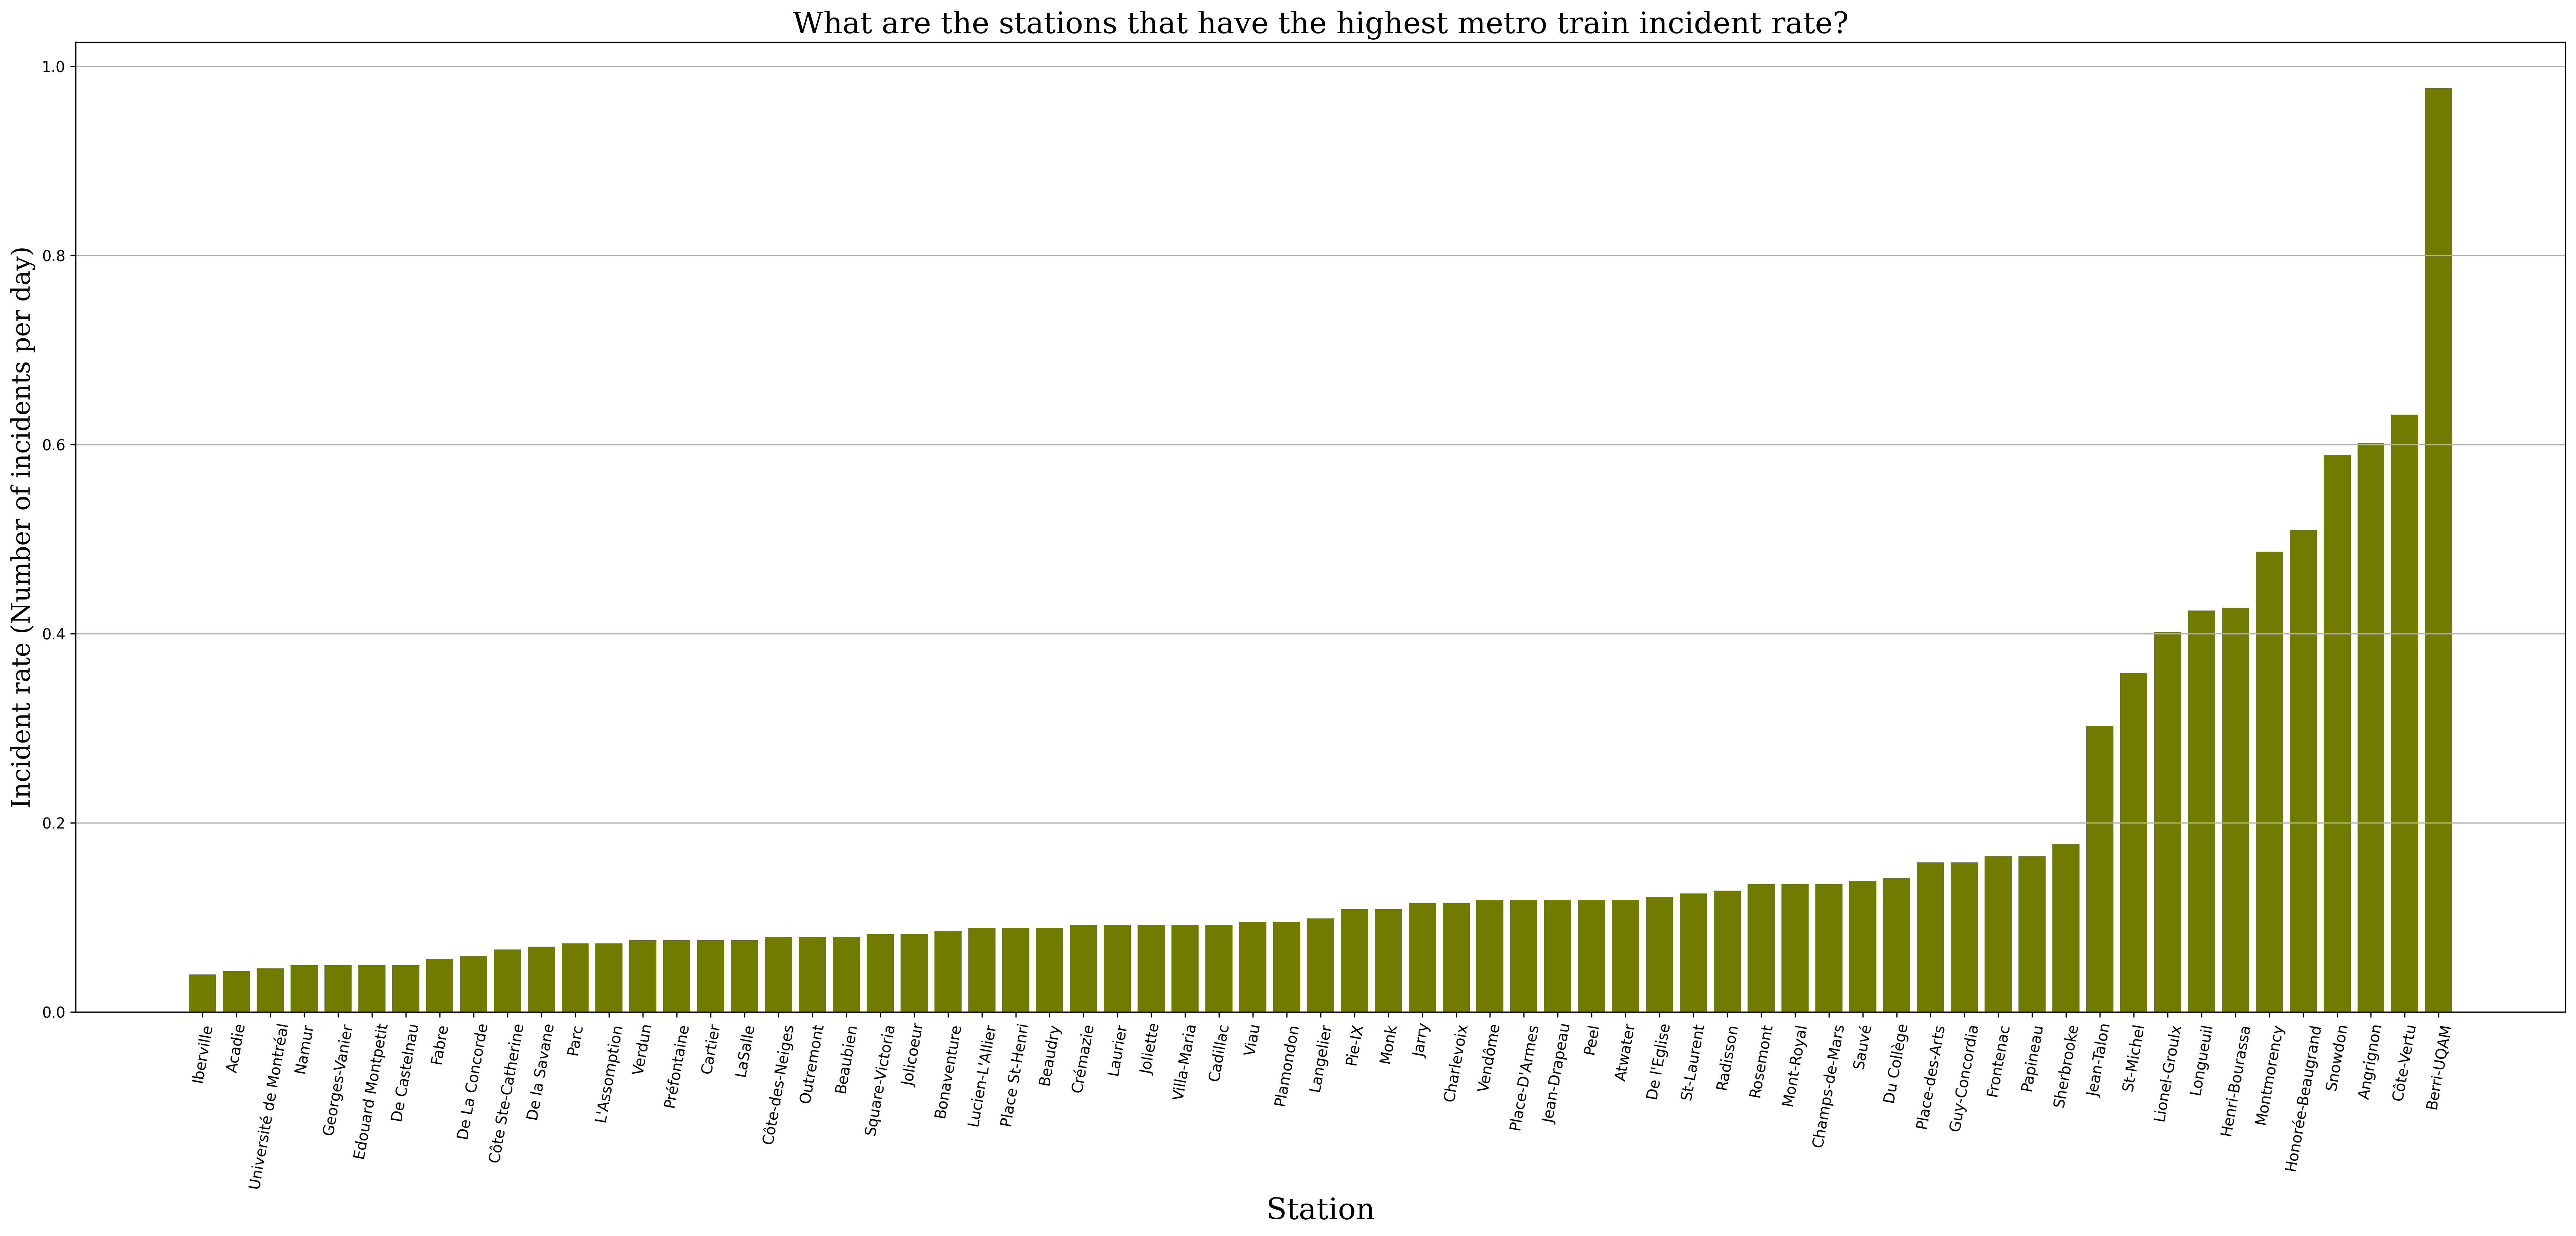

In [ ]:
plt.figure(figsize=[30,12],dpi=300)
plt.title('What are the stations that have the highest metro train incident rate?',fontdict={'family':'serif','size':20})
plt.xlabel('Station',fontdict={'family':'serif','size':20})
plt.ylabel('Incident rate (Number of incidents per day)',fontdict={'family':'serif','size':17})
plt.bar(plot_station.index,plot_station.values,color="xkcd:poop green")
plt.grid(True,axis='y')
plt.xticks(rotation=80)

plt.show()

We can clearly see that Berri-UQAM is the station having the most incidents in 2019, which is normal since this station is one of the biggest STM metro stations. Also, the six stations having the highest incident rate are stations where different lines of metro join or stations where the metro line ends. It is meaningful because it demonstrates that stations having more traffic are likely to have more incidents too. In short, these types of stations are a factor that well explains the incident rate in the metro network.

Does the day of the year have an impact on the number of incident?

In [ ]:
narrowed_stations.dtypes

Numero d'incident      object
Type d'incident        object
Cause primaire         object
Cause secondaire       object
Symptome               object
Ligne                  object
Numéro de tournée      object
Heure de l'incident    object
Heure de reprise       object
Véhicule               object
Porte de voiture       object
Type de matériel       object
Dommage matériel        int64
KFS                     int64
Porte                   int64
Urgence métro           int64
CAT                     int64
Évacuation             object
Année civile            int64
Année civile/mois      object
Mois calendrier         int64
Jour du mois            int64
Jour de la semaine      int64
Jour calendaire        object
dtype: object

*Jour calendaire* is not recognized by python as date, we should therefore add a column with the same info, that is recognized as dates.


In [ ]:
narrowed_stations['date']=pd.to_datetime(narrowed_stations['Jour calendaire'], format="%Y/%m/%d")
narrowed_stations.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Dommage matériel,KFS,Porte,Urgence métro,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire,date
Code de lieu,,,,,,,,,,,,,,,,,,,,,,,,,
Berri-UQAM,T01011901,T,Autres,Causes externes,"Feu, fumée, odeur, produit, etc...",Ligne verte,#,02:28,02:28,#,#,Non affecté,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01
Place-des-Arts,T01011902,T,Clientèle,Méfait volontaire,Clientèle,Ligne verte,#,02:37,02:37,#,#,Non affecté,0,0,0,0,1,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01
Place-D'Armes,T01011903,T,Clientèle,Méfait volontaire,Clientèle,Ligne orange,59,04:27,04:30,10195,#,Non affecté,0,0,0,0,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01
Radisson,T01011904,T,Clientèle,Méfait volontaire,Clientèle,Ligne verte,61,05:22,05:26,#,#,Non affecté,0,0,0,0,1,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01
St-Laurent,T01011905,T,Clientèle,Méfait volontaire,Équipements fixes,Ligne verte,#,06:25,06:35,#,#,Non affecté,0,0,0,0,1,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01


In [ ]:
#now that the dates are in the correct format, let us proceed to the next step:
narrowed_stations["day"] = narrowed_stations["date"].dt.dayofyear
narrowed_stations.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Dommage matériel,KFS,Porte,Urgence métro,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire,date,day
Code de lieu,,,,,,,,,,,,,,,,,,,,,,,,,,
Berri-UQAM,T31101912,T,Matériel roulant,MR-73,Matériel roulant,Ligne verte,41,17:24,17:29,78003,#,73,0,0,0,0,0,#,2019,2019-10,10,31,4,2019-10-31,2019-10-31,304
Rosemont,T31101913,T,Clientèle,Nuisance involontaire,Matériel roulant,Ligne orange,16,17:42,17:58,10481,#,Non affecté,0,0,0,1,1,Train,2019,2019-10,10,31,4,2019-10-31,2019-10-31,304
Cadillac,T31101914,T,Clientèle,Méfait volontaire,Clientèle,Ligne verte,9,19:27,19:29,#,#,Non affecté,0,0,1,0,0,#,2019,2019-10,10,31,4,2019-10-31,2019-10-31,304
Fabre,T31101915,T,Clientèle,Blessée ou malade,Clientèle,Ligne bleue,3,19:51,19:59,78014,2;,Non affecté,0,1,0,0,0,#,2019,2019-10,10,31,4,2019-10-31,2019-10-31,304
Berri-UQAM,T31101917,T,Matériel roulant,MR-73,Matériel roulant,Ligne verte,33,23:27,23:30,78028,#,73,0,0,0,0,0,#,2019,2019-10,10,31,4,2019-10-31,2019-10-31,304


In [ ]:
date_df = narrowed_stations['day'].value_counts(normalize=True).sort_index()
date_df

1      0.004127
2      0.002064
3      0.002948
4      0.001769
5      0.001179
         ...   
300    0.002653
301    0.002064
302    0.003243
303    0.005012
304    0.003243
Name: day, Length: 304, dtype: float64

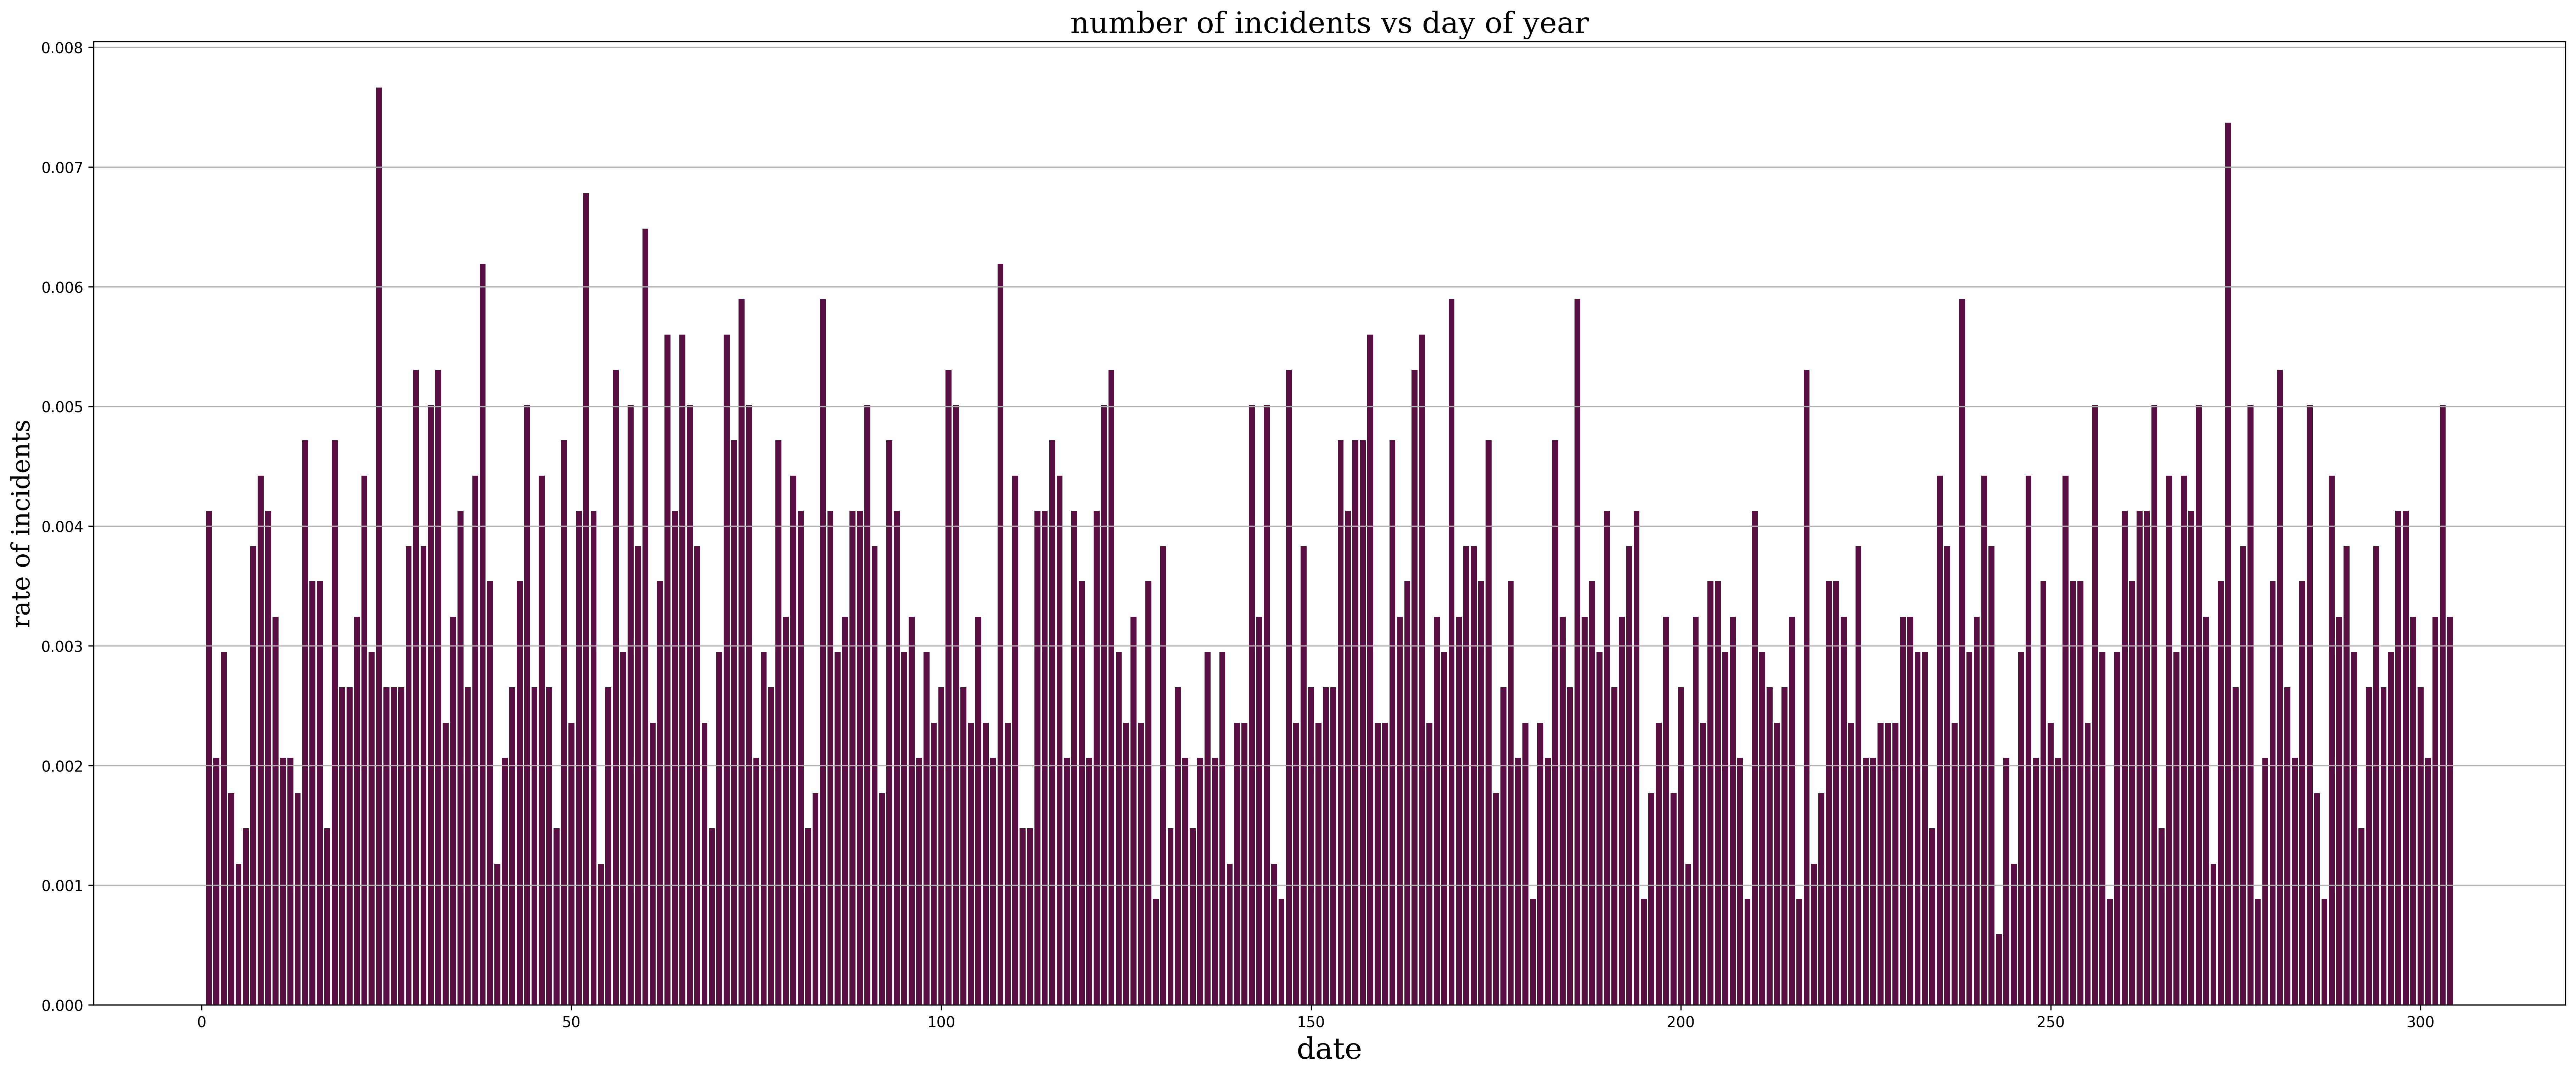

In [ ]:
plt.figure(figsize=[30,12],dpi=300)
plt.title('number of incidents vs day of year',fontdict={'family':'serif','size':20})
plt.xlabel('date',fontdict={'family':'serif','size':20})
plt.ylabel('rate of incidents',fontdict={'family':'serif','size':17})
plt.bar(date_df.index,date_df.values,color="xkcd:plum")
plt.grid(True,axis='y')


plt.show()

Since our dataset does not contain data from a entire year, we cannot visualize a pattern in the graph.

## Does the weekend have a lower incident rate than the other days?

We suppose that there is less accidents on the weekend since there is less service due to less traffic. We will verify this statement.

In [ ]:
day_incidents = train_incidents.groupby('Jour de la semaine').size()
day_incidents

Jour de la semaine
1    620
2    662
3    649
4    691
5    695
6    453
7    424
dtype: int64

In [ ]:
#Changing the index of the dataset for it to represent days of the week:
day_incidents_renamed = day_incidents.rename(index={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'})
day_incidents_renamed

Jour de la semaine
Monday       620
Tuesday      662
Wednesday    649
Thursday     691
Friday       695
Saturday     453
Sunday       424
dtype: int64

In [ ]:
#Calculating the rate of incidents per day:
day_incidents_rate = day_incidents_renamed / 304
day_incidents_rate


Jour de la semaine
Monday       2.039474
Tuesday      2.177632
Wednesday    2.134868
Thursday     2.273026
Friday       2.286184
Saturday     1.490132
Sunday       1.394737
dtype: float64

Let's visualize the incident rates for each week day.

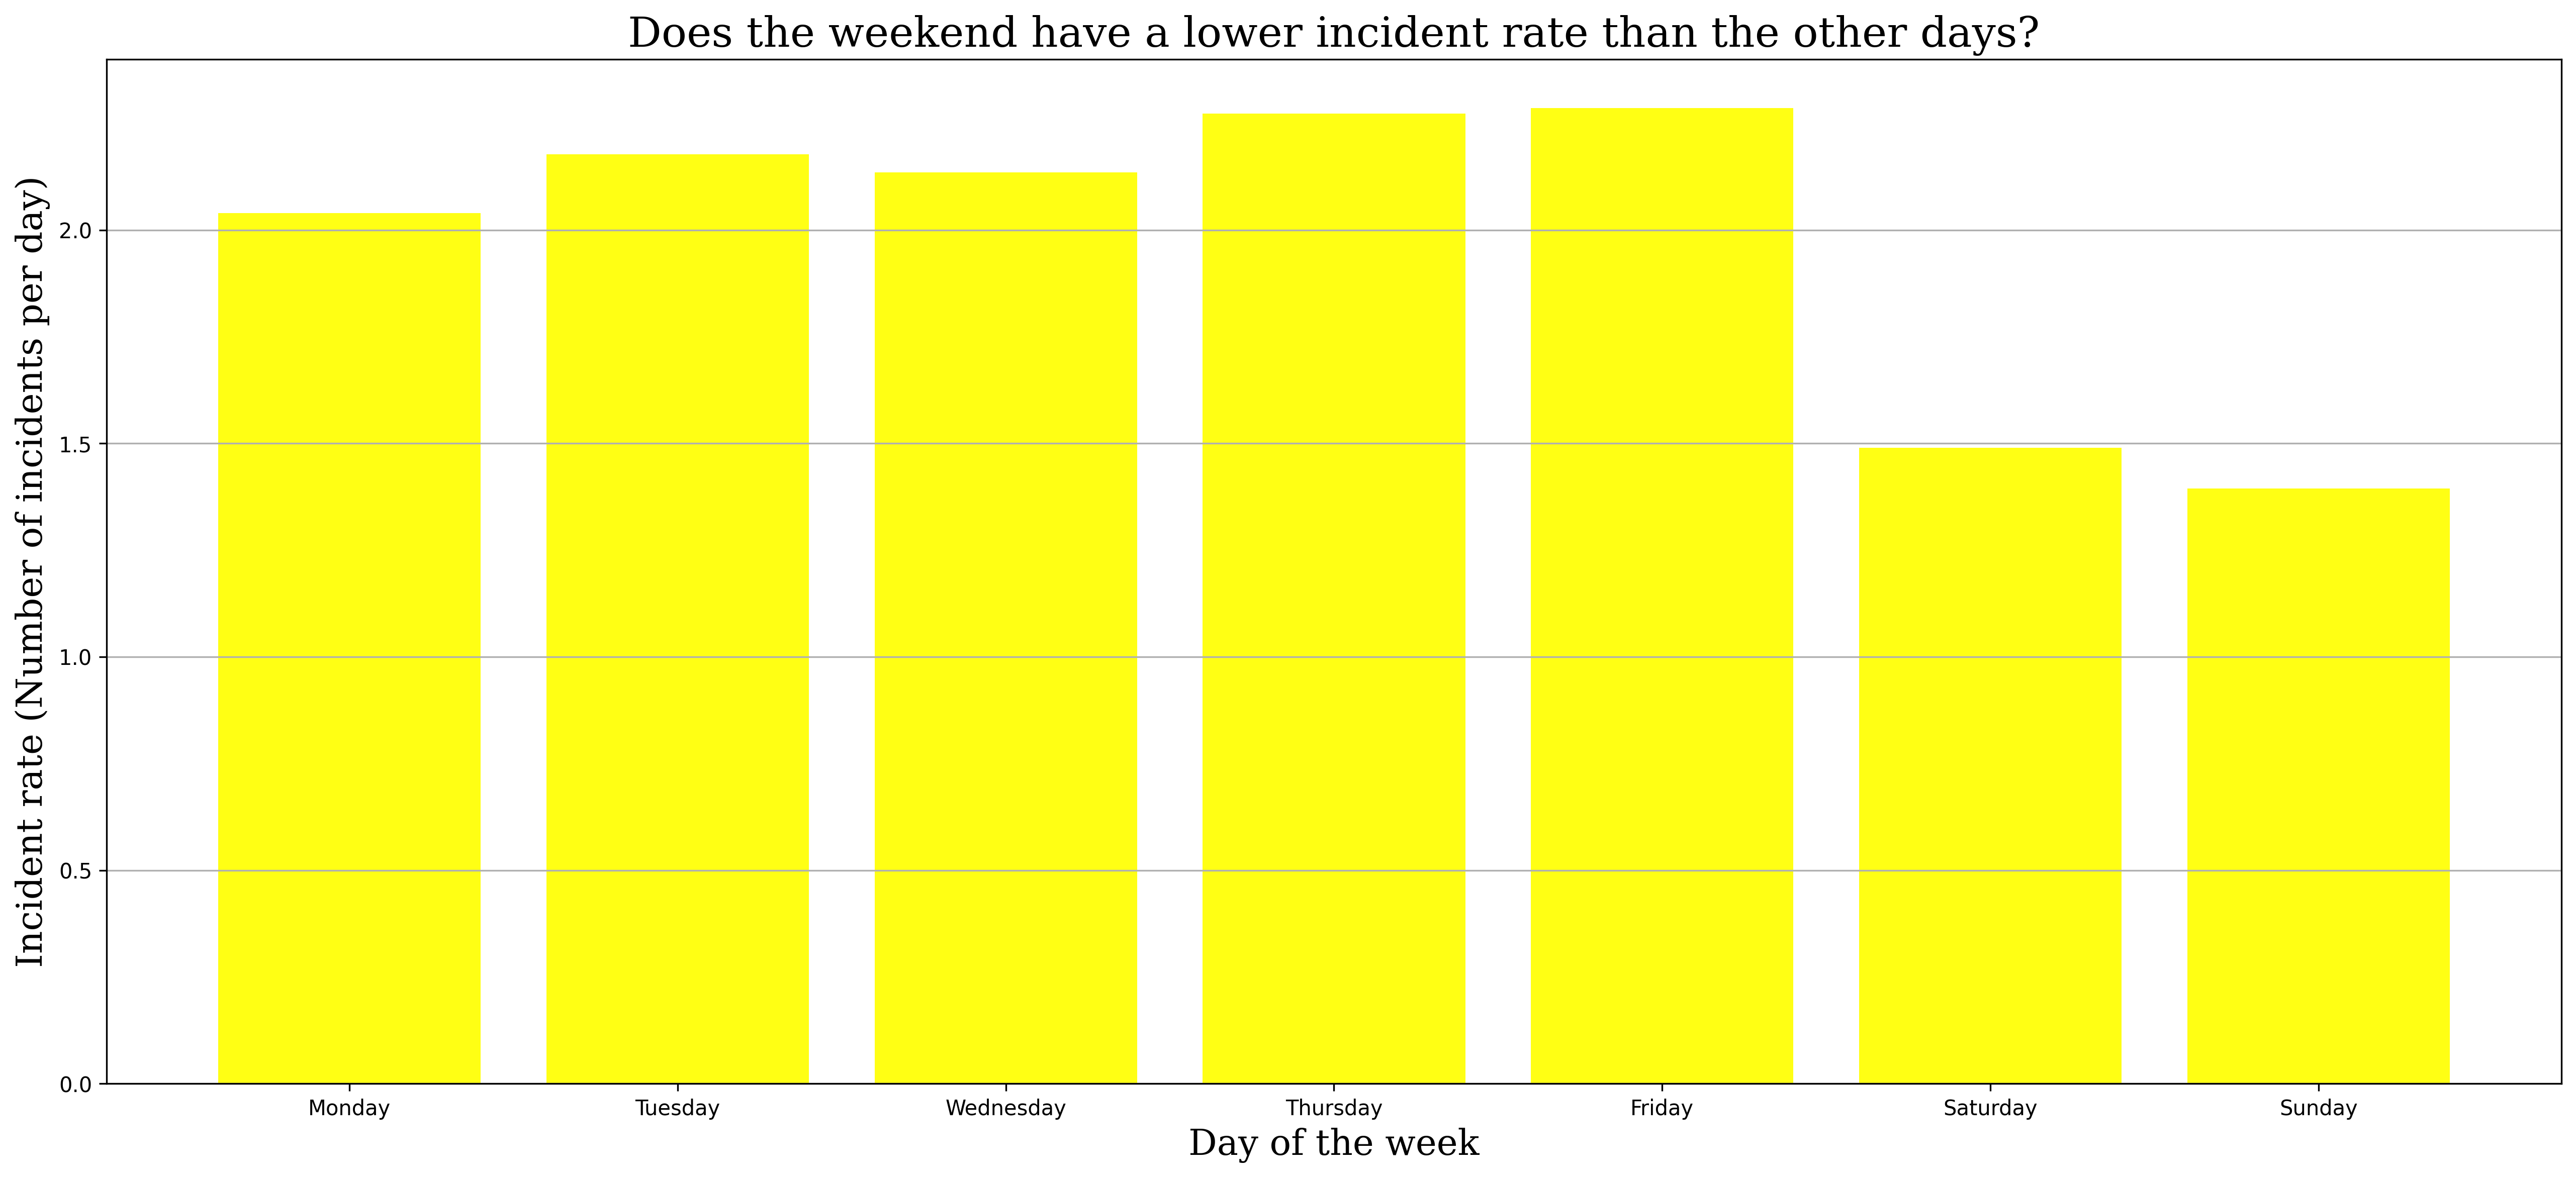

In [ ]:
plt.figure(figsize=[21,9],dpi=300)
plt.title('Does the weekend have a lower incident rate than the other days?',fontdict={'family':'serif','size':20})
plt.xlabel('Day of the week',fontdict={'family':'serif','size':17})
plt.ylabel('Incident rate (Number of incidents per day)',fontdict={'family':'serif','size':17})
plt.bar(day_incidents_rate.index,day_incidents_rate.values,color="xkcd:yellow")
plt.grid(True,axis='y')
plt.show()

As we supposed, Saturday and Sunday have lower incident rates. It is understandable since people take less transport during the weekends and they take more transport from Monday to Friday to travel to work. So, we can state that week days are an important factor in explaining the metro incident rate.

## What are the biggest causes declared of metro train incidents?

We can verify if human activity is indeed an important factor in train accidents.

In [ ]:
train_incidents.shape

(4194, 25)

We can see that there is 4194 metro train incidents in our dataset. For each primary and secondary causes, we will calculate the proportion of incidents.  

In [ ]:
first_cause = train_incidents.groupby('Cause primaire').size() / train_incidents.shape[0]
first_cause

Cause primaire
#N/D                   0.000238
Autres                 0.064616
Clientèle              0.479018
Exploitation trains    0.136147
Matériel roulant       0.194325
Équipements fixes      0.125656
dtype: float64

We join the primary and secondary causes to form all causes in one data frame.

In [ ]:
second_cause = train_incidents.groupby('Cause secondaire').size() / train_incidents.shape[0]
second_cause

Cause secondaire
#N/D                      0.000238
Blessée ou malade         0.115403
Causes externes           0.026943
Centre de contrôle        0.005246
Contrats MPM10            0.007153
Contrats Réno-Stations    0.010253
Contrats Réno-Système     0.007630
Ligne 1, 2, 4, 5          0.130901
MPM-10                    0.049595
MR-73                     0.144254
Méfait volontaire         0.186218
Nuisance involontaire     0.177396
Pers. / Équipement STM    0.012637
Service TCPE              0.002384
Service aux stations      0.006438
Service aux trains        0.087744
Service de la voie        0.029089
Véhicules de travaux      0.000477
dtype: float64

In [ ]:
cause = first_cause.append(second_cause)
cause = cause.sort_values()
cause

#N/D                      0.000238
#N/D                      0.000238
Véhicules de travaux      0.000477
Service TCPE              0.002384
Centre de contrôle        0.005246
Service aux stations      0.006438
Contrats MPM10            0.007153
Contrats Réno-Système     0.007630
Contrats Réno-Stations    0.010253
Pers. / Équipement STM    0.012637
Causes externes           0.026943
Service de la voie        0.029089
MPM-10                    0.049595
Autres                    0.064616
Service aux trains        0.087744
Blessée ou malade         0.115403
Équipements fixes         0.125656
Ligne 1, 2, 4, 5          0.130901
Exploitation trains       0.136147
MR-73                     0.144254
Nuisance involontaire     0.177396
Méfait volontaire         0.186218
Matériel roulant          0.194325
Clientèle                 0.479018
dtype: float64

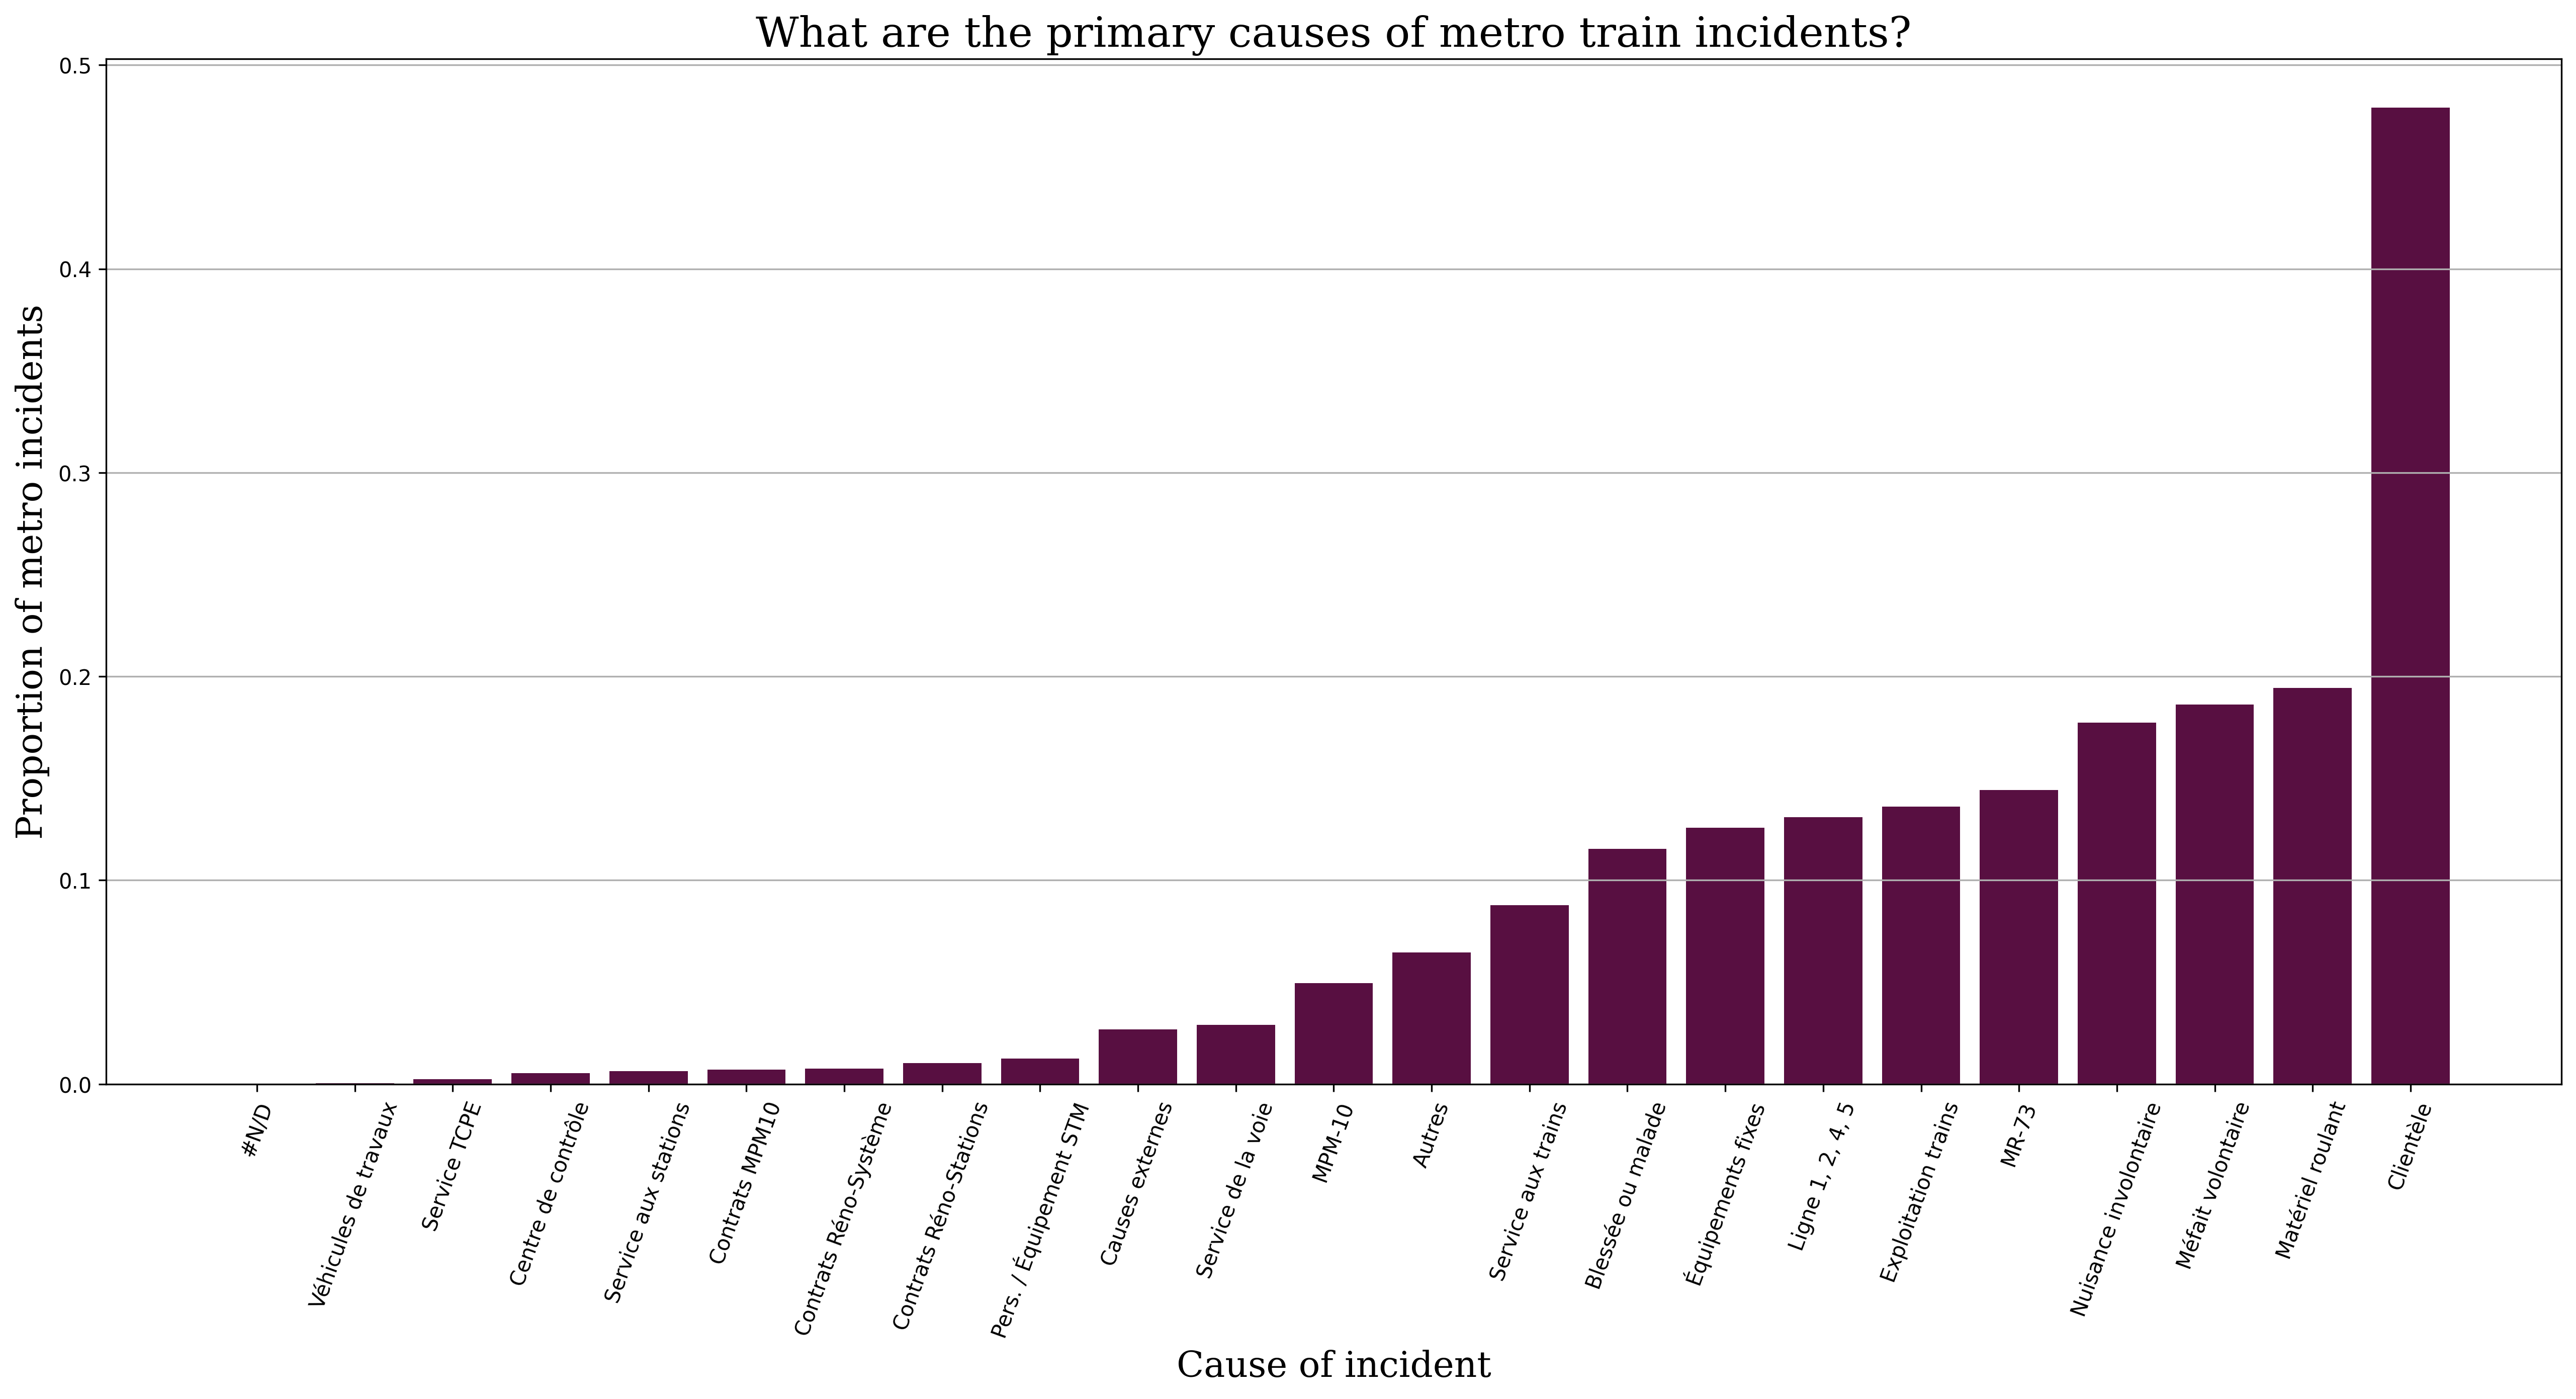

In [ ]:
plt.figure(figsize=[21,9],dpi=300)
plt.title('What are the primary causes of metro train incidents?',fontdict={'family':'serif','size':20})
plt.xlabel('Cause of incident',fontdict={'family':'serif','size':17})
plt.ylabel('Proportion of metro incidents',fontdict={'family':'serif','size':17})
plt.bar(cause.index,cause.values,color='xkcd:plum')
plt.grid(True,axis='y')
plt.xticks(rotation=70)
plt.show()

From the bar chart above, we can clearly see that customers have a big impact in metro incidents. Additionally, rolling material which represents dysfunctional metro trains is a significant factor in incidents occuring. Also, 
there are willful mischief and involontary nuisance that come into play which 
probably come from human activity too. People are an important factor to explain the metro train incident rate. 

In [ ]:
cause['Clientèle'] * 100

47.90176442536958

Indeed, the STM clientele is nearly half the proportion (47%) of causes of incidents occuring in metro trains.

What percentage of cases of incidents do customers use the urgency brake?
 

In [ ]:
train_incidents['KFS'].mean() * 100

3.5765379113018603

In 3.6% of cases of incidents, the emergency brake is used.

What is the proportion of incidents where a train door is involved?

In [ ]:
train_incidents['Porte'].mean() * 100

13.996185026227945

14% of the time a train door is involved in incidents.

Again, this demonstrates that people who take the metro tend to be a significant reason in incidents happening throughout the metro network. 

# Conclusion

The goal of our report was to answer the following question: What factors seem to best explain the daily Montréal STM metro incident rate? We analyzed the STM metro incident dataset to find accurate arguments and results in response to our question. We found that stations with high traffic and weekdays from Monday to Friday are crucial in demonstrating metro train accident rates. Also, among causes declared by the STM, the clientele was the cause of incidents in nearly half the causes. Train malfunction (19%), voluntary mischief (19%), and involuntary nuisance (17%) are important factors too. After all, human activity is the most essential element in explaining metro train incident rate due to its unpredictable behavior and major flaws.